<a href="https://colab.research.google.com/github/DomjanKatarina/Statistics/blob/main/stats_housing_agency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Scenario

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Upper management will like to get some insight into the following.

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

**Project Steps**:

*Step 1*: We familiarize ourself with the dataset 

*Step 2*: Generate basic statistics and visualizations for upper management. 

*Step 3*: Use the appropriate tests to answer the questions provided.

**Meta data** (describes the dataset variables):

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

*This data was modified for this problem and the link to the complete dataset can be found in the sklearn.datasets library*

In [ ]:
# All the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Import the data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url, index_col=[0])

In [ ]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## *Question 1*: Is there a significant difference in the median value of houses bounded by the Charles river or not?

The solution: 
1. Compare the two groups (houses bounded by the Charles river and houses not bounded by the Charles river) observing the median values of owner-occupied homes, using *box plot visualization*. Visualizing how many houses are actually bounded by the Charles river using *bar plot*.
2. Perform a *t-test of independent samples* comparing medians of the two groups, where the null hypothesis is *H0: mean_1 = mean_2* and the alternative hypothesis is *Ha: mean_1 != mean_2*. The test of equality of variances should be performed first.

[Text(0.5, 1.0, 'Box plots of the houses bonded by the Charles river or no')]

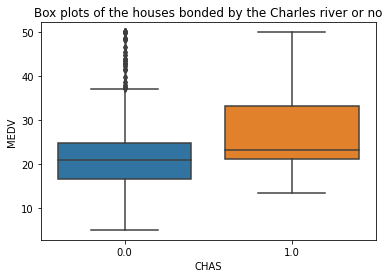

In [ ]:
# STEP 1.1: Box plot visualization 
sns.boxplot(x='CHAS', y='MEDV', data=boston_df).set(title='Box plots of the houses bonded by the Charles river or no')

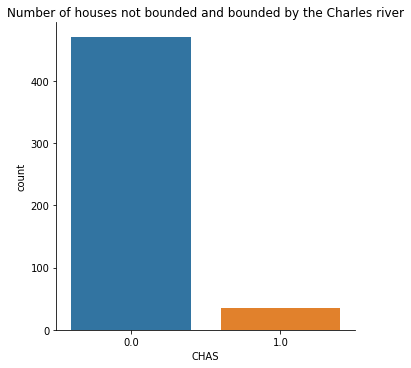

In [ ]:
# STEP 1.2.: Bar plot visualization
sns.catplot(x='CHAS', kind='count', data=boston_df).set(title='Number of houses not bounded and bounded by the Charles river')

In [ ]:
# STEP 2.1.: Comparing the variances of the independent samples
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [ ]:
# STEP 2.2.: T-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

### Conclusion to Question 1: 

Observing the box plot we can see that the mean of the median value of houses bounded to the Charles river is higher than the mean of the median values of the houses not bonded to the Charles river. The question of "Is the difference between the two means statistically significant?" arrises. We can answer this question either performing a t-test of two independent samples.

We obtain p-values of `0.0036`, which is less then 0.05, meaning there is sufficient evidence to reject the null hypothesis that says that the two means are the same, therefore there is significant difference between the means of each group. 

The answer is yes, there is a significant difference in the median values of houses bounded by the Charles river or not.

## Question 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Solution: The discretization of variable "proportion of owner-occupied units built before 1940" is necessary. We divide it in three groups:
- 35 years and younger
- between 35 and 70 years old 
- 70 years or older

We then observe the means of the median values of each group with box-plot visualization and performing an ANOVA statistical test to determine wether the means are the same or there is a significant difference in one of the means. We will also use linear regresion function as an alternative to ANOVA test.

The steps are the following:
1. Discretization of the variable `AGE`
2. Visualization of the three groups with box-plot
3. ANOVA test: H0: mean_1 = mean_2 = mean_3 and Ha:one of the means is statistically significantly different
4. Linear regression as ANOVA alternative

In [ ]:
# STEP 1: Discretization of AGE by adding another column AGE_class to boston_df
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_class'] = '35_or_younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_class'] = 'between_35_and_70'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_class'] = '70_or_older'

[Text(0.5, 1.0, 'Box Plots of AGE groups observing MEDV variable')]

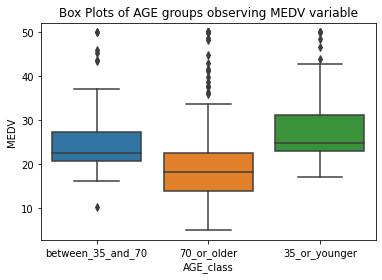

In [ ]:
# STEP 2: Boxplot
sns.boxplot(x='AGE_class', y='MEDV', data=boston_df).set(title="Box Plots of AGE groups observing MEDV variable")

In [ ]:
# STEP 3: ANOVA test
group1 = boston_df[boston_df['AGE_class'] == '35_or_younger']['MEDV']
group2 = boston_df[boston_df['AGE_class'] == 'between_35_and_70']['MEDV']
group3 = boston_df[boston_df['AGE_class'] == '70_or_older']['MEDV']

f_statistics, p_value = scipy.stats.f_oneway(group1, group2, group3)
print(f_statistics, p_value)

36.40764999196599 1.7105011022702984e-15


In [ ]:
# STEP 4: Linear function as alternative to ANOVA
X = pd.get_dummies(boston_df[['AGE_class']])
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.71e-15
Time:                        08:37:08   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          18.1292      0.321     56.399      0.000      17.498      18.761
AGE_class_35_or_younger         9.6466      0.715     13.496      0.000       8.242      11.051
AGE_class_70_or_older           1.6642      0.482      3.451      0.001       0.717       2.612
AGE_class_between_35_and_70     6.8184      0.627     10.875      0.000       5.587       8.050
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                     1.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Conculsion to Question 2: 

By plotting the box-plots for each of the three groups, we can notice that the group of 35 years or younger has the highest mean and the group of 70 years or older has the lowest mean. But are these differences statistically significant?

Performing ANOVA test or using a OLS model we get the same p-value for the F-statistics with the value of `1.71e-15`, which is smaller than 0.05. This means that there is a sufficiant evidence to reject the null hypothesis, which says that all three means are the same.

The answer is yes, there is a statistically significant difference between median values of houses of each proportion of owner-occupied units built before 1940.

## Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

Solution: We will observe the relationship between the two variables (`NOX` and `INDUS`) by visualizating the data on scatterplot, performing a Pearson's correlation test and using a linear regression model as an alternative to Pearson's correlation test.

Steps:
1. Plot the scatterplot
2. Perform a Pearson's correlation test
3. Use OLS as alternative

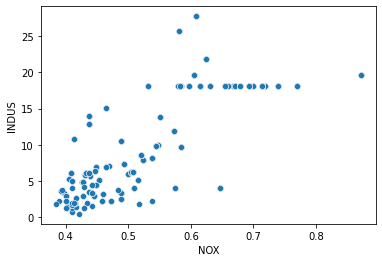

In [ ]:
# STEP 1: Scatterplot
# sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

In [ ]:
# STEP 2: Pearson's correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

In [ ]:
# STEP 3: OLS
y = boston_df['INDUS']
X = boston_df['NOX']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           7.91e-98
Time:                        08:59:43   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion to Question 3:

By plotting the two variables using scatterplot we can notice a positive relationship between the two variables. We perform a Pearson's correlation test where the first value is the Pearson's correlation coeficient (`0.764`) and the second is the p-value. As p-value (`7.91e-98`) is smaller than 0.05 we can reject the null hypothesis that says there is no association between the two variables. Using OLS function we get the same p-value (`Prob(F-statistics)`) and the same correlation coefficient (`sqrt(R-squared)`). 

The answer is no, we can conclude there is positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

## Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Solution: We are going to plot the two variables (`MEDV` and `DIS`) using scatterplot to see if there is some relationship between the two variables. We are going to reject/confirm the association of the two variables using correlation test. Finally we are going to use a linear regression model to see the coeficient between the two variables.

Steps:
1. Scatterplot
2. Pearson's correlation test
3. Linear Regression

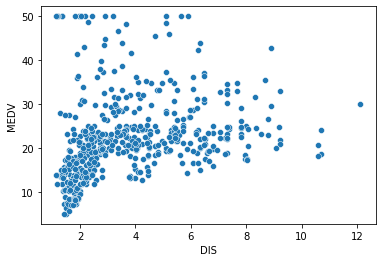

In [ ]:
# STEP 1: Scatterplot
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

In [ ]:
# STEP 2: Pearsons's correlation test
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

(0.2499287340859039, 1.2066117273368017e-08)

In [ ]:
#STEP 3: OLS
y = boston_df['MEDV']
X = boston_df['DIS']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        09:39:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion to question 4:

Observing the low value of R-squared `0.062` we see that an insignificant amount of variance of `MEDV` can be explained by the `DIS`. Because we already noticed in the scatterplot and confirmed it by Pearson's correlation test the two variables do not have linear relationship, meaning the values from the coefficient table can not be interpreted meaningfully. In conclusion, an additional weighted distance to the five Boston employment centres do not have significant impact on the median value of owner-occupied homes.